# Import libraries

In [295]:
from utils import generate_samples_linear_reg
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Generate sample

In [296]:
# Sample data from population which is linearly distributed

samples = 5000
features = 3
lower_bound = 0
upper_bound = 5
intercept = 10
coeffecients = [25,10,13]
sigma = 40

X, y = generate_samples_linear_reg(
    samples,
    features,
    lower_bound,
    upper_bound,
    intercept,
    coeffecients,
    sigma
)

print("Shape of samples is: ",X.shape)
# print("Samples are: ", X)

print("\n Shape of labels is: ",y.shape)
# print("Labels are: ", y)



Shape of samples is:  (5000, 3)

 Shape of labels is:  (5000,)


In [297]:
# Plot of samples - To verify linearity assumption

# plt.scatter(X,y)
# plt.xlabel("Feature")
# plt.ylabel("Label")
# plt.show()


# Train model

In [298]:
# Train linear regression model

X_with_intercept = sm.add_constant(X)
model = sm.OLS(y,X_with_intercept)
model_results = model.fit()
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1923.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:11:42   Log-Likelihood:                -25613.
No. Observations:                5000   AIC:                         5.123e+04
Df Residuals:                    4996   BIC:                         5.126e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.4534      1.792      5.835      0.000       6.941      13.966
x1            25.2275      0.395     63.835      0.000      24.453      26.002
x2             9.6443      0.398     24.221      0.000       8.864      10.425
x3            12.7357      0.395     32.266      0.000      11.962      13.509
==============================================================================
Omnibus:                        2.485   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.522
Skew:                          -0.052   Prob(JB):                        0.283
Kurtosis:                       2.965   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Prediction

In [299]:
# Predictions

y_pred = model_results.predict(X_with_intercept)
mean_squared_error = np.mean((y - y_pred) ** 2)
print("Mean squared error is: ",mean_squared_error)
print("Estimated standard deviation in errors is (Square root of mean squared error of fitted model): ",
      np.sqrt(len(y)*mean_squared_error/(len(y)-X.shape[1]-1)))
print("Actual standard deviation in errors is: ", sigma)

# Plot of actual and predicted labels

# plt.scatter(X,y,color='r',label='Actual')
# plt.plot(X,y_pred,color='g',label='Predicted')
# plt.xlabel("Feature")
# plt.ylabel("Label")
# plt.title("Prediction vs Actual plot")
# plt.legend()
# plt.show()


Mean squared error is:  1648.063040819785
Estimated standard deviation in errors is (Square root of mean squared error of fitted model):  40.61259098921504
Actual standard deviation in errors is:  40


# Diagnostic plots

In [300]:
# Get leverage points and influence points in sample. These will be used to plot graphs.
# Leverage points - These are points (X) than are far away from mean (X_mean)
# Influence points - These are the points (X) which have large influence on the fit of the model.

influence = model_results.get_influence() 
leverage = influence.hat_matrix_diag 

Min error is:  -133.6358630226933
Max error is:  142.0355073916817
Mean of errors is:  0.0


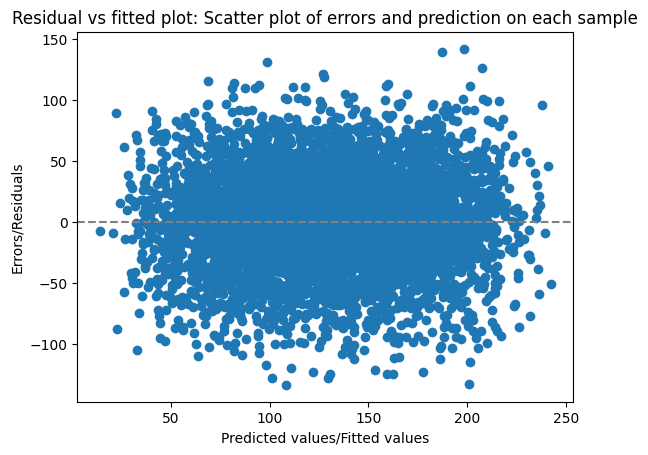

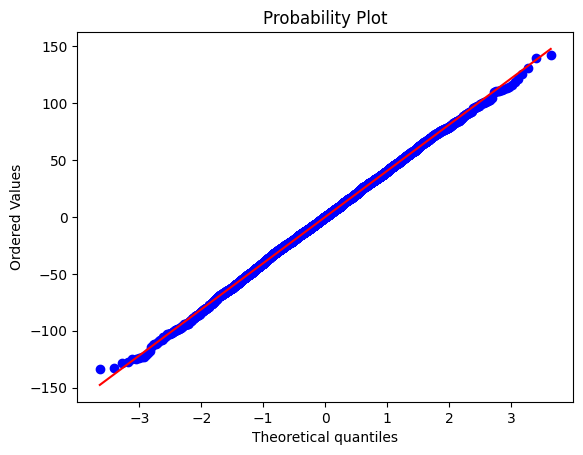

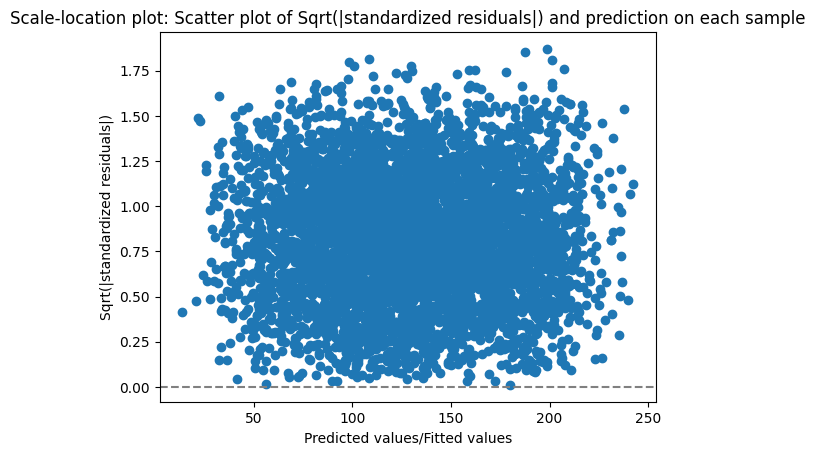

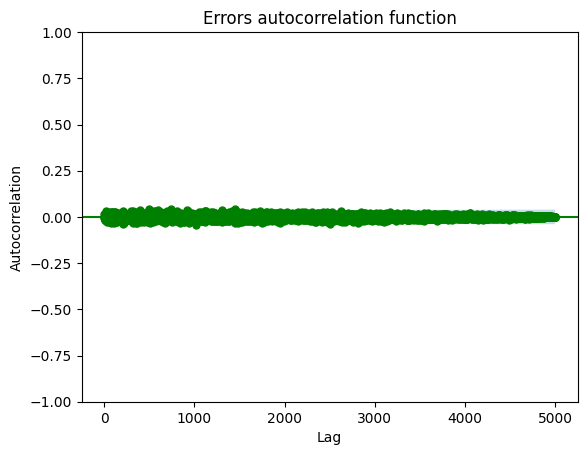

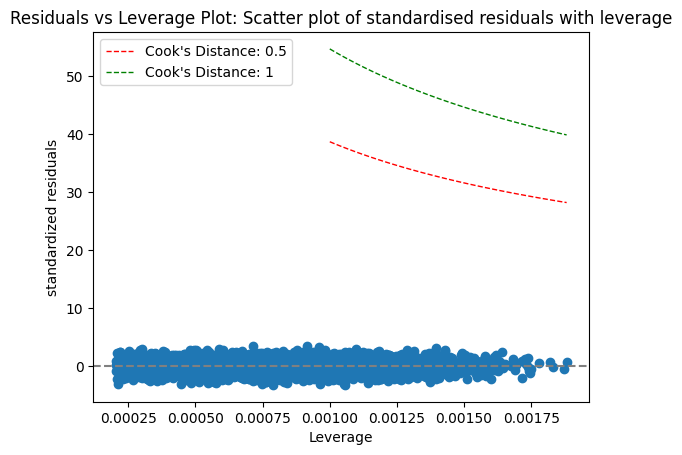

<Figure size 1200x1200 with 0 Axes>

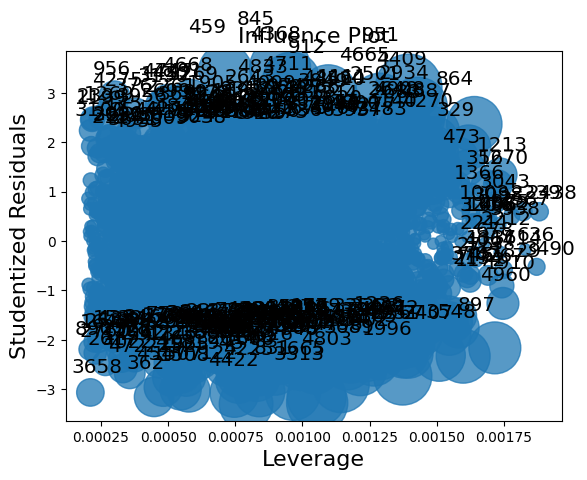

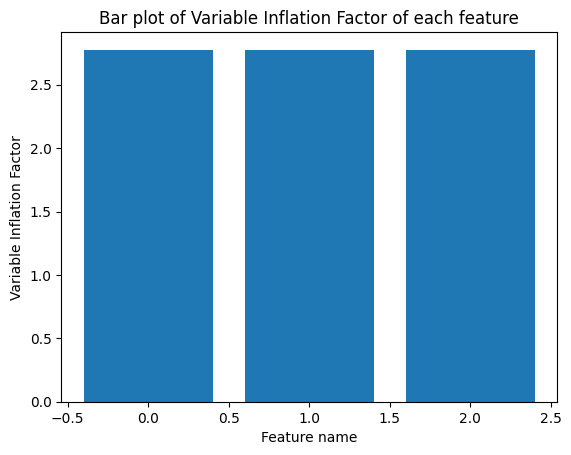

In [301]:
# Plot of errors

errors = y-y_pred
errors_standardized = (errors-np.mean(errors))/np.std(errors,ddof=2)
errors_standardized_abs_sqrt = np.sqrt(np.absolute((errors-np.mean(errors)))/np.std(errors,ddof=2))

# Error Statistics - To check mean of errors

print("Min error is: ",np.min(errors))
print("Max error is: ",np.max(errors))
print("Mean of errors is: ",round(np.mean(errors),2))

# Residual vs fitted plot - To check linearity and homoscedasticity

plt.scatter(y_pred,errors)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Errors/Residuals")
plt.title("Residual vs fitted plot: Scatter plot of errors and prediction on each sample")
plt.show()

# Histogram of errors - To check Normality

# plt.hist(errors, bins=samples//5)
# plt.xlabel("Error")
# plt.ylabel("Frequency")
# plt.title("Histogram of errors")
# plt.show()

# Error Q-Q plot - To check normality

stats.probplot(errors, dist="norm", plot=plt)
plt.show() 


# Error scatter plot - To check homoscedasticity

# plt.scatter(X,errors)
# plt.axhline(y=0, color='grey', linestyle='dashed') 
# plt.xlabel("Feature")
# plt.ylabel("Error")
# plt.title("Scatter plot of error on each sample")
# plt.show()

# Scale-location plot - To check homoscedasticity

plt.scatter(y_pred,errors_standardized_abs_sqrt)
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel("Predicted values/Fitted values")
plt.ylabel("Sqrt(|standardized residuals|)")
plt.title("Scale-location plot: Scatter plot of Sqrt(|standardized residuals|) and prediction on each sample")
plt.show()

# Error autocorrelation plot - To check independence of errors

tsaplots.plot_acf(errors, color='g', lags=np.arange(1,len(errors)),title='Errors autocorrelation function')
# tsaplots.plot_acf(errors, color='g', lags=np.arange(1,100),title='Errors autocorrelation function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Residual vs leverage plot: To check linearity, heteroskedasticity and outliers
cook_distance = model_results.get_influence().cooks_distance[0]
    # Plot cook's line of 0.5
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((0.5 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 0.5", lw=1, ls='--', color='red')
    # Plot cook's line of 1
x_values = np.linspace(0.001, max(leverage), 50)
y_values = np.apply_along_axis(lambda x: np.sqrt((1 * X.shape[1] * (1 - x)) / x),axis=0,arr=x_values)
plt.plot(x_values, y_values, label="Cook's Distance: 1", lw=1, ls='--', color='green')

plt.scatter(leverage, errors_standardized) 
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel('Leverage') 
plt.ylabel('standardized residuals') 
plt.title('Residuals vs Leverage Plot: Scatter plot of standardised residuals with leverage') 
plt.legend()
plt.show()

# Plot Cook's distance plot: To check linearity, heteroskedasticity and outliers
plt.figure(figsize=(12,12))
sm.graphics.influence_plot(model_results, criterion="cooks") 
plt.show()
# The numbers in the output of this graph indicate sample index numbers which are influential


# Variable inflation factor: To check multicollinearity
vif = pd.DataFrame()
X_df=pd.DataFrame(X)
vif["variables"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values,i) for i in range(X.shape[1])]
plt.bar(x=vif["variables"],height=vif["VIF"])
plt.xlabel("Feature name")
plt.ylabel("Variable Inflation Factor")
plt.title("Bar plot of Variable Inflation Factor of each feature")
plt.show()


# Confounding - Stratification

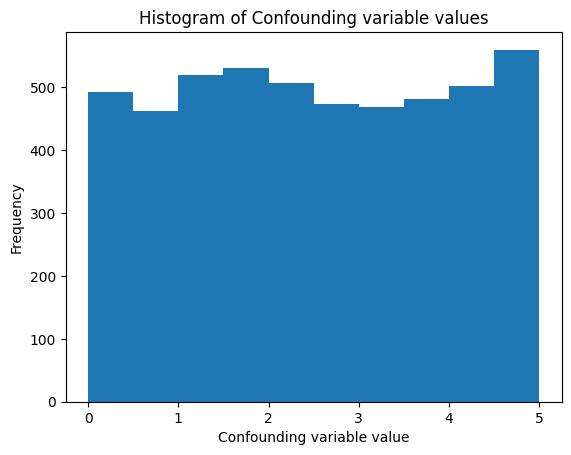

In [302]:
# The hypothesis is that a new feature is a confounding feature which influences relationship between 2nd feature in regression model and 
# independent variable.

counfounding_variable = np.random.uniform(lower_bound, upper_bound, size=samples)
plt.hist(counfounding_variable,bins=10)
plt.title("Histogram of Confounding variable values")
plt.xlabel("Confounding variable value")
plt.ylabel("Frequency")
plt.show()

In [303]:
# Add confounding variable to the original dataframe of dependent features

X_confound_df = pd.DataFrame(X)
X_confound_df['confound'] = counfounding_variable

In [304]:
# Group the original dataset into categories in which confounding variable does not vary much. In this case, in 5 categories:
# 0-1,1-2,2-3,3-4,4-5

data_df = X_confound_df.copy()
data_df['confound_categories'] = np.where(data_df['confound']<1,1,
                                          np.where(data_df['confound']<2,2,
                                                   np.where(data_df['confound']<3,3,
                                                            np.where(data_df['confound']<4,4,5))))
data_df['label'] = y
data_df

,0,1,2,confound,confound_categories,label
0,2.762481,0.111939,2.310555,2.532313,3,69.559025
1,3.283553,3.415665,2.924306,1.994545,2,229.946940
2,0.606305,1.647578,2.668477,0.498153,1,46.133884
3,2.514489,2.783673,2.967876,2.110655,3,79.862213
4,2.101559,1.477757,1.734298,4.985566,5,96.436620
...,...,...,...,...,...,...
4995,4.790256,2.243114,2.279898,4.102177,5,214.971758
4996,1.650179,0.361213,4.908363,0.312535,1,88.748479
4997,3.544096,1.378644,0.485291,3.066613,4,135.149904
4998,0.736620,4.488128,0.305721,2.845529,3,31.465390


In [305]:
# Create multiple datasets based on categories

data_df_subset_1 = data_df[data_df['confound_categories']==1]
y_subset_1_df = data_df_subset_1['label']
X_subset_1_df = data_df_subset_1.drop(['confound','confound_categories','label'],axis=1)

data_df_subset_2 = data_df[data_df['confound_categories']==2]
y_subset_2_df = data_df_subset_2['label']
X_subset_2_df = data_df_subset_2.drop(['confound','confound_categories','label'],axis=1)

data_df_subset_3 = data_df[data_df['confound_categories']==3]
y_subset_3_df = data_df_subset_3['label']
X_subset_3_df = data_df_subset_3.drop(['confound','confound_categories','label'],axis=1)

data_df_subset_4 = data_df[data_df['confound_categories']==4]
y_subset_4_df = data_df_subset_4['label']
X_subset_4_df = data_df_subset_4.drop(['confound','confound_categories','label'],axis=1)

data_df_subset_5 = data_df[data_df['confound_categories']==5]
y_subset_5_df = data_df_subset_5['label']
X_subset_5_df = data_df_subset_5.drop(['confound','confound_categories','label'],axis=1)

In [306]:
# Running regression on 1st subset

X_subset_1_with_intercept = sm.add_constant(X_subset_1_df.to_numpy())
model_subset_1 = sm.OLS(y_subset_1_df.to_numpy(),X_subset_1_with_intercept)
model_subset_1_results = model_subset_1.fit()
model_subset_1_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     394.0
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          2.81e-166
Time:                        16:12:21   Log-Likelihood:                -4893.2
No. Observations:                 955   AIC:                             9794.
Df Residuals:                     951   BIC:                             9814.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5239      3.918      2.686      0.007       2.835      18.213
x1            24.8958      0.880     28.305      0.000      23.170      26.622
x2            10.5564      0.884     11.938      0.000       8.821      12.292
x3            12.4878      0.903     13.836      0.000      10.717      14.259
==============================================================================
Omnibus:                        8.308   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                8.301
Skew:                          -0.227   Prob(JB):                       0.0158
Kurtosis:                       3.048   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
# Running regression on 2nd subset

X_subset_2_with_intercept = sm.add_constant(X_subset_2_df.to_numpy())
model_subset_2 = sm.OLS(y_subset_2_df.to_numpy(),X_subset_2_with_intercept)
model_subset_2_results = model_subset_2.fit()
model_subset_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     406.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.61e-175
Time:                        16:12:21   Log-Likelihood:                -5405.5
No. Observations:                1051   AIC:                         1.082e+04
Df Residuals:                    1047   BIC:                         1.084e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0102      4.091      2.202      0.028       0.983      17.037
x1            26.5741      0.891     29.825      0.000      24.826      28.322
x2             9.6138      0.910     10.565      0.000       7.828      11.399
x3            12.9714      0.870     14.907      0.000      11.264      14.679
==============================================================================
Omnibus:                        0.252   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.335
Skew:                           0.015   Prob(JB):                        0.846
Kurtosis:                       2.918   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
# Running regression on 3rd subset

X_subset_3_with_intercept = sm.add_constant(X_subset_3_df.to_numpy())
model_subset_3 = sm.OLS(y_subset_3_df.to_numpy(),X_subset_3_with_intercept)
model_subset_3_results = model_subset_3.fit()
model_subset_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     361.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          8.20e-158
Time:                        16:12:21   Log-Likelihood:                -5026.8
No. Observations:                 980   AIC:                         1.006e+04
Df Residuals:                     976   BIC:                         1.008e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5560      4.136      1.585      0.113      -1.561      14.673
x1            25.1399      0.912     27.568      0.000      23.350      26.929
x2            10.6235      0.896     11.851      0.000       8.864      12.383
x3            12.7555      0.901     14.161      0.000      10.988      14.523
==============================================================================
Omnibus:                        4.601   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.511
Skew:                          -0.164   Prob(JB):                        0.105
Kurtosis:                       3.048   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
# Running regression on 4th subset

X_subset_4_with_intercept = sm.add_constant(X_subset_4_df.to_numpy())
model_subset_4 = sm.OLS(y_subset_4_df.to_numpy(),X_subset_4_with_intercept)
model_subset_4_results = model_subset_4.fit()
model_subset_4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     362.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          1.05e-156
Time:                        16:12:22   Log-Likelihood:                -4862.4
No. Observations:                 951   AIC:                             9733.
Df Residuals:                     947   BIC:                             9752.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1031      4.101      2.707      0.007       3.055      19.151
x1            25.4182      0.911     27.906      0.000      23.631      27.206
x2             8.4250      0.908      9.282      0.000       6.644      10.206
x3            13.0125      0.892     14.584      0.000      11.262      14.764
==============================================================================
Omnibus:                        0.275   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.365
Skew:                          -0.008   Prob(JB):                        0.833
Kurtosis:                       2.905   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
# Running regression on 5th subset

X_subset_5_with_intercept = sm.add_constant(X_subset_5_df.to_numpy())
model_subset_5 = sm.OLS(y_subset_5_df.to_numpy(),X_subset_5_with_intercept)
model_subset_5_results = model_subset_5.fit()
model_subset_5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     398.4
Date:                Sun, 21 Apr 2024   Prob (F-statistic):          3.51e-173
Time:                        16:12:22   Log-Likelihood:                -5415.6
No. Observations:                1063   AIC:                         1.084e+04
Df Residuals:                    1059   BIC:                         1.086e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0684      3.810      3.955      0.000       7.592      22.544
x1            24.0590      0.834     28.865      0.000      22.424      25.695
x2             9.0523      0.859     10.544      0.000       7.368      10.737
x3            12.4163      0.851     14.582      0.000      10.746      14.087
==============================================================================
Omnibus:                        1.522   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.597
Skew:                           0.082   Prob(JB):                        0.450
Kurtosis:                       2.904   Cond. No.                         15.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [311]:
# Checking the regression coeffecients of 2nd variable in initial regression model and after dividing into subgroups of confounding variables

print("Initial Regression: Coeffecient of 2nd variable :",model_results.params[2]," & p-value is :",model_results.pvalues[2])
print("Confounding 1st subset: Coeffecient of 2nd variable :",model_subset_1_results.params[2]," & p-value is :",
      model_subset_1_results.pvalues[2])
print("Confounding 2nd subset: Coeffecient of 2nd variable :",model_subset_2_results.params[2]," & p-value is :",
      model_subset_2_results.pvalues[2])
print("Confounding 3rd subset: Coeffecient of 2nd variable :",model_subset_3_results.params[2]," & p-value is :",
      model_subset_3_results.pvalues[2])
print("Confounding 4th subset: Coeffecient of 2nd variable :",model_subset_4_results.params[2]," & p-value is :",
      model_subset_4_results.pvalues[2])
print("Confounding 5th subset: Coeffecient of 2nd variable :",model_subset_5_results.params[2]," & p-value is :",
      model_subset_5_results.pvalues[2])


Initial Regression: Coeffecient of 2nd variable : 9.644279207857995  & p-value is : 1.2298665232151578e-122
Confounding 1st subset: Coeffecient of 2nd variable : 10.556382618501635  & p-value is : 1.0336136041133868e-30
Confounding 2nd subset: Coeffecient of 2nd variable : 9.613817026837426  & p-value is : 7.367560308681058e-25
Confounding 3rd subset: Coeffecient of 2nd variable : 10.62345514288646  & p-value is : 2.28551320672782e-30
Confounding 4th subset: Coeffecient of 2nd variable : 8.424980805165553  & p-value is : 1.1003526140919262e-19
Confounding 5th subset: Coeffecient of 2nd variable : 9.05234381779776  & p-value is : 8.728957265869985e-25


In [ ]:
# The coeffecient of linear regression for 2nd feature remains similar on all the subsets of data with significant p-values. It shows that
# the newly introduced feature is not a confounding variable for the 2nd feature.